# IMDb Statistical Analysis Project

*An exploratory data analysis of IMDb movie data to uncover trends and patterns in cinema*

## Introduction

This notebook presents a statistical analysis of IMDb movie data, exploring the relationships between various factors such as ratings, box office performance, director influence, and temporal trends across different decades. The goal is to unravel the mysteries behind what makes certain films successful, both critically and commercially.

### Research Questions

1. How have box office earnings evolved over different decades?
2. Which directors consistently produce highly-rated films?
3. What correlations exist between runtime, ratings, box office performance, and critic scores?
4. Can we identify statistically significant trends in the film industry over time?

### Dataset Overview

We're using a dataset of 1000 top-rated movies from IMDb, which includes information such as movie titles, release years, ratings, box office earnings, runtime, directors, and starring actors. This dataset provides a comprehensive view of critically acclaimed cinema throughout history.

# Required Libraries for Analysis

In [20]:
import numpy as np
import pandas as pd
import scipy.stats as st
from  sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import math as m

## Data Dictionary

Before diving into the analysis, let's understand the variables in our dataset:

| Variable | Description |
|----------|-------------|
| Poster_Link | URL to the movie poster image |
| Series_Title | Title of the movie |
| Released_Year | Year the movie was released |
| Certificate | Movie rating certificate (e.g., U, A, UA) |
| Runtime | Duration of the movie in minutes |
| Genre | Categories the movie belongs to |
| IMDB_Rating | Rating of the movie on IMDb (scale: 1-10) |
| Overview | Brief summary of the movie |
| Meta_score | Score assigned by metacritic critics (scale: 0-100) |
| Director | Director of the movie |
| Star1, Star2, Star3, Star4 | Main actors/actresses in the movie |
| No_of_Votes | Number of votes received on IMDb |
| Gross | Box office earnings in dollars |

For our analysis, we'll focus primarily on the following variables: Director, IMDB_Rating, Released_Year, Meta_score, No_of_Votes, Runtime, and Gross.

## Data Exploration

Let's load and examine the dataset to understand its structure and contents.

In [21]:
imdb = pd.read_csv('https://raw.githubusercontent.com/utkarsh820/Datasets/refs/heads/main/imdb.csv')
imdb.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


Selection of Required Feature

In [22]:
data = imdb.copy()
data = data[['Director','IMDB_Rating','Released_Year','Meta_score','No_of_Votes','Runtime','Gross']]
data.head()

,Director,IMDB_Rating,Released_Year,Meta_score,No_of_Votes,Runtime,Gross
0,Frank Darabont,9.3,1994,80.0,2343110,142 min,"28,341,469"
1,Francis Ford Coppola,9.2,1972,100.0,1620367,175 min,"134,966,411"
2,Christopher Nolan,9.0,2008,84.0,2303232,152 min,"534,858,444"
3,Francis Ford Coppola,9.0,1974,90.0,1129952,202 min,"57,300,000"
4,Sidney Lumet,9.0,1957,96.0,689845,96 min,"4,360,000"


# Data Cleaning

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Director       1000 non-null   object 
 1   IMDB_Rating    1000 non-null   float64
 2   Released_Year  1000 non-null   object 
 3   Meta_score     843 non-null    float64
 4   No_of_Votes    1000 non-null   int64  
 5   Runtime        1000 non-null   object 
 6   Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


# Checking Null Values percent

In [24]:
null_rows = data[data.isnull().any(axis=1)]
null_percent = len(null_rows) / len(data) * 100
null_percent

25.0

In [25]:
data.isnull().sum()

Director           0
IMDB_Rating        0
Released_Year      0
Meta_score       157
No_of_Votes        0
Runtime            0
Gross            169
dtype: int64

#### Before Fixing Dataset we will be checking Distribution type


In [26]:
from scipy.stats import skew
data_filt = data.dropna(subset=['Gross']).copy()
data_filt['Gross'] = data_filt['Gross'].str.replace(',', '').astype(float)
print(round(skew(data_filt['Gross']).astype(float),3))

3.124


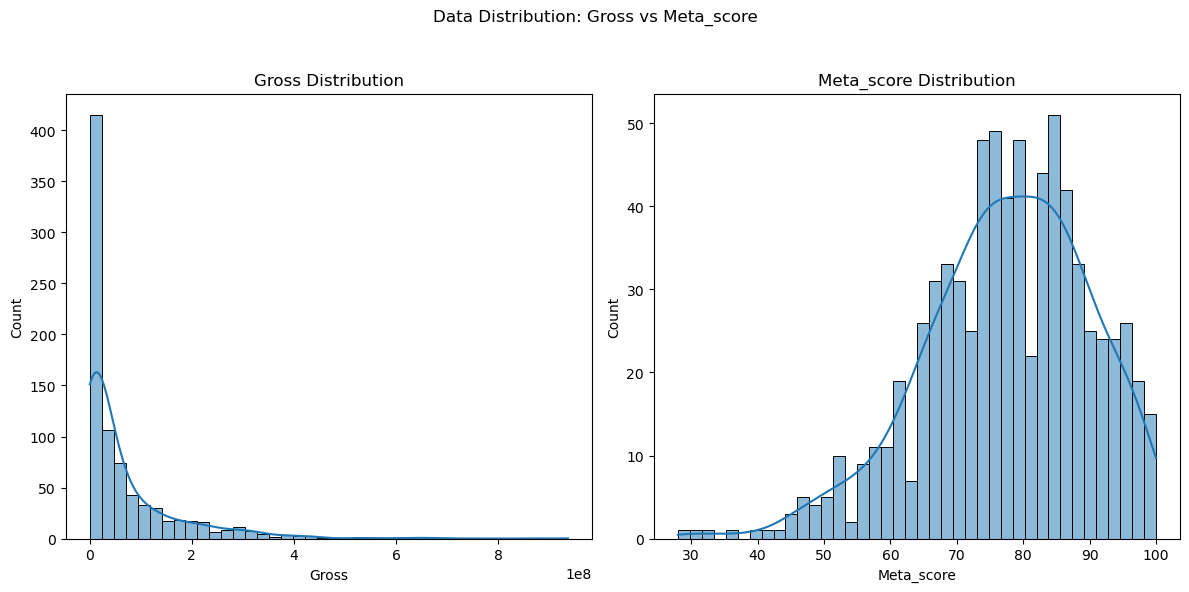

In [27]:
# Visualization of KDE
fig, ax = plt.subplots(1,2,figsize=(12,6))
sns.histplot(data_filt['Gross'],bins=40,kde=True,ax=ax[0])
ax[0].set_title('Gross Distribution')
sns.histplot(data_filt['Meta_score'],bins=40,kde=True,ax=ax[1])
ax[1].set_title('Meta_score Distribution')
fig.suptitle("Data Distribution: Gross vs Meta_score")
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust to fit suptitle
plt.show()

### Conclusion , Since Our data is Right Skewed we will go with median , to Replace our Gross Col

In [28]:
#Converting to correct dtypes
data['Released_Year'] = pd.to_datetime(data['Released_Year'],errors='coerce').dt.year
data['Meta_score'] = data['Meta_score'].fillna(data['Meta_score'].mean()) #---> Fine since it's close to normal distributions
# Convert 'Gross' column to numeric, handling commas and errors
data['Gross'] = data['Gross'].str.replace(',','')
data['Gross'] = data['Gross'].astype(float)
data['Gross'] = data['Gross'].fillna(data['Gross'].median()) # Since it Right skewed Mean > Median > mode
data['Runtime'] = data['Runtime'].str.replace("min",'').astype(int)

#replacing missing col in Release Year
data['Released_Year'] = data['Released_Year'].fillna(1995.0)  #If you guy's wondering why 1995 search through Google and looked into data_set like name,star,story.
#Let's recheck data.info()

print(data.info())
print(15*" --- --- ")
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Director       1000 non-null   object 
 1   IMDB_Rating    1000 non-null   float64
 2   Released_Year  1000 non-null   float64
 3   Meta_score     1000 non-null   float64
 4   No_of_Votes    1000 non-null   int64  
 5   Runtime        1000 non-null   int32  
 6   Gross          1000 non-null   float64
dtypes: float64(4), int32(1), int64(1), object(1)
memory usage: 50.9+ KB
None
 --- ---  --- ---  --- ---  --- ---  --- ---  --- ---  --- ---  --- ---  --- ---  --- ---  --- ---  --- ---  --- ---  --- ---  --- --- 
Director         0
IMDB_Rating      0
Released_Year    0
Meta_score       0
No_of_Votes      0
Runtime          0
Gross            0
dtype: int64


#### Adding decade

In [29]:
data['Decade'] = (data['Released_Year'] // 10) * 10
data.head()

,Director,IMDB_Rating,Released_Year,Meta_score,No_of_Votes,Runtime,Gross,Decade
0,Frank Darabont,9.3,1994.0,80.0,2343110,142,28341469.0,1990.0
1,Francis Ford Coppola,9.2,1972.0,100.0,1620367,175,134966411.0,1970.0
2,Christopher Nolan,9.0,2008.0,84.0,2303232,152,534858444.0,2000.0
3,Francis Ford Coppola,9.0,1974.0,90.0,1129952,202,57300000.0,1970.0
4,Sidney Lumet,9.0,1957.0,96.0,689845,96,4360000.0,1950.0


## Exploratory Data-Analysis-Part (EDA)

In [30]:
# Describing Our data
data.describe()

,IMDB_Rating,Released_Year,Meta_score,No_of_Votes,Runtime,Gross,Decade
count,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1.000000e+03,1000.000000
mean,7.949300,1991.221000,77.97153,2.736929e+05,122.891000,6.051360e+07,1986.590000
std,0.275491,23.285669,11.36206,3.273727e+05,28.093671,1.014192e+08,23.177772
min,7.600000,1920.000000,28.00000,2.508800e+04,45.000000,1.305000e+03,1920.000000
25%,7.700000,1976.000000,72.00000,5.552625e+04,103.000000,5.012919e+06,1970.000000
50%,7.900000,1999.000000,77.97153,1.385485e+05,119.000000,2.353089e+07,1990.000000
75%,8.100000,2009.000000,85.25000,3.741612e+05,137.000000,6.153989e+07,2000.000000
max,9.300000,2020.000000,100.00000,2.343110e+06,321.000000,9.366622e+08,2020.000000


In [31]:
director_ratings = data.groupby("Director")['IMDB_Rating'].mean().sort_values(ascending=False).head(10)
director_ratings

Director
Frank Darabont        8.95
Irvin Kershner        8.70
Lana Wachowski        8.70
George Lucas          8.60
Roberto Benigni       8.60
Masaki Kobayashi      8.60
Thomas Kail           8.60
Sudha Kongara         8.60
Fernando Meirelles    8.60
Roger Allers          8.50
Name: IMDB_Rating, dtype: float64

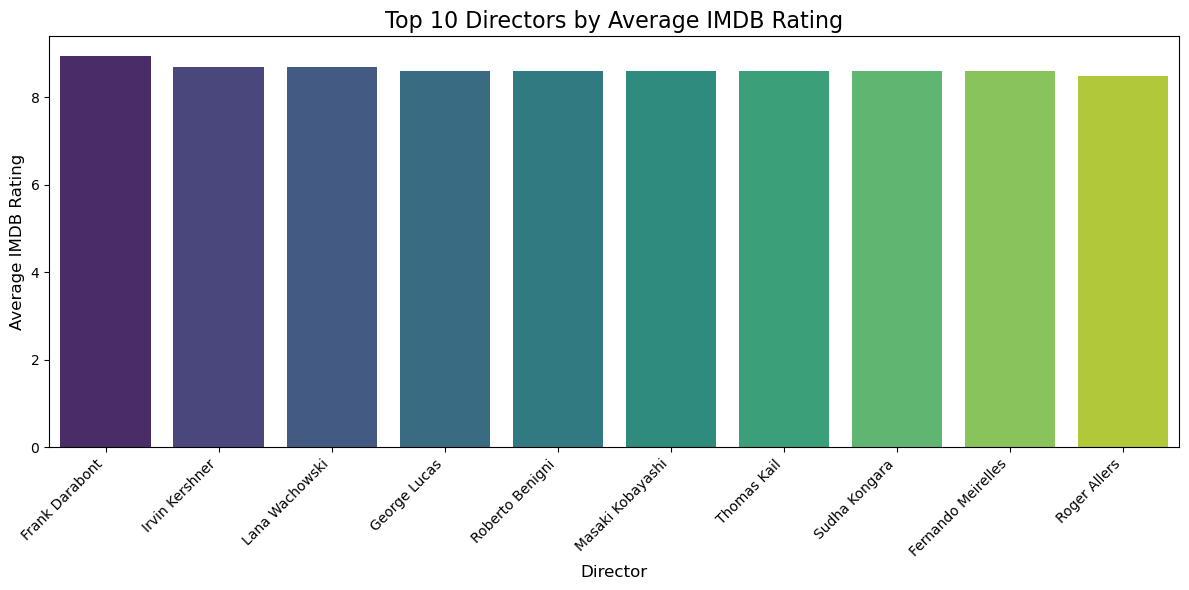

In [32]:
plt.figure(figsize=(12, 6))  # Adjust figure size for better visibility
sns.barplot(x=director_ratings.index, y=director_ratings.values,hue = director_ratings.index, palette="viridis")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.title("Top 10 Directors by Average IMDB Rating", fontsize=16)
plt.xlabel("Director", fontsize=12)
plt.ylabel("Average IMDB Rating", fontsize=12)
plt.tight_layout()

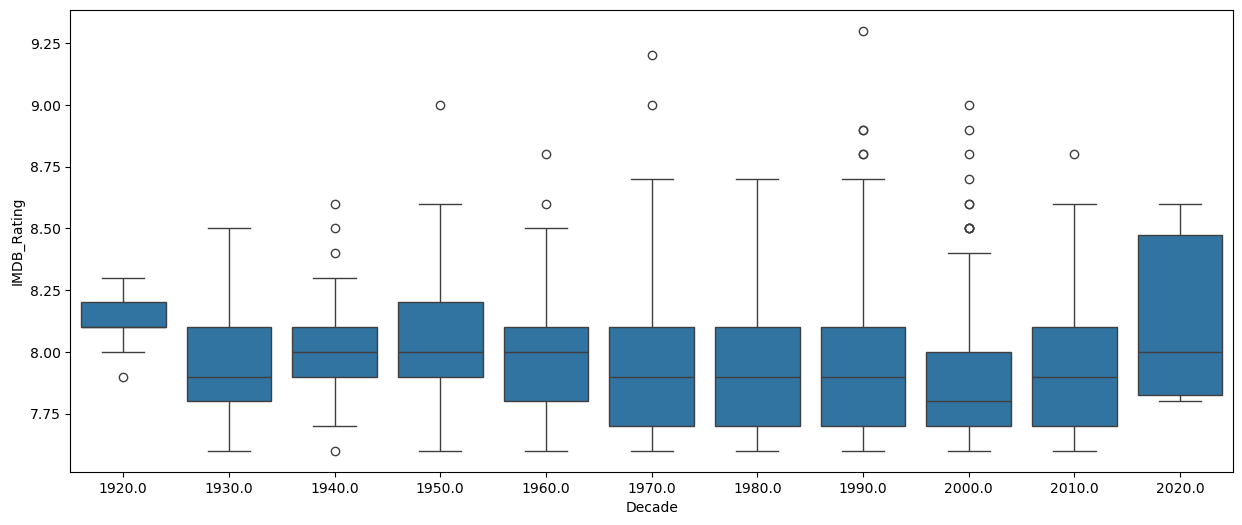

In [33]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Decade',y='IMDB_Rating',data=data)

plt.show()

# Lets Explore Correaltion

Normalized Covariance Matrix:
               Runtime  IMDB_Rating     Gross  Meta_score
Runtime      1.001001     0.243339  0.138492   -0.027822
IMDB_Rating  0.243339     1.001001  0.085604    0.254157
Gross        0.138492     0.085604  1.001001   -0.045361
Meta_score  -0.027822     0.254157 -0.045361    1.001001

Normalized Correlation Matrix:
               Runtime  IMDB_Rating     Gross  Meta_score
Runtime      1.000000     0.243096  0.138353   -0.027794
IMDB_Rating  0.243096     1.000000  0.085518    0.253903
Gross        0.138353     0.085518  1.000000   -0.045315
Meta_score  -0.027794     0.253903 -0.045315    1.000000


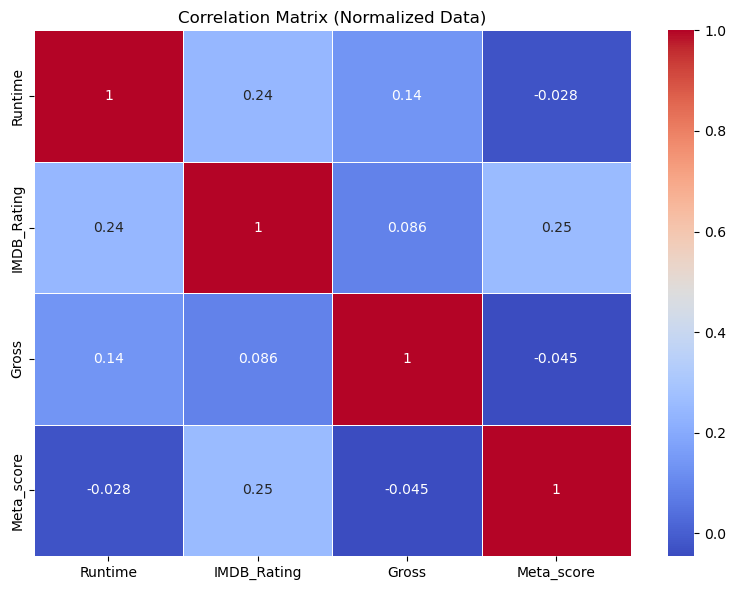

In [34]:
scaler = StandardScaler()
relations = data[['Runtime', 'IMDB_Rating', 'Gross', 'Meta_score']]
relations_scaled = pd.DataFrame(scaler.fit_transform(relations), columns=relations.columns)

# Covariance and Correlation on Normalized Data
cov_matrix_scaled = relations_scaled.cov()
corr_matrix_scaled = relations_scaled.corr()

# Show both matrices
print("Normalized Covariance Matrix:\n", cov_matrix_scaled)
print("\nNormalized Correlation Matrix:\n", corr_matrix_scaled)

# Heatmap of Correlation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_scaled, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix (Normalized Data)")
plt.tight_layout()
plt.show()

### Trend line

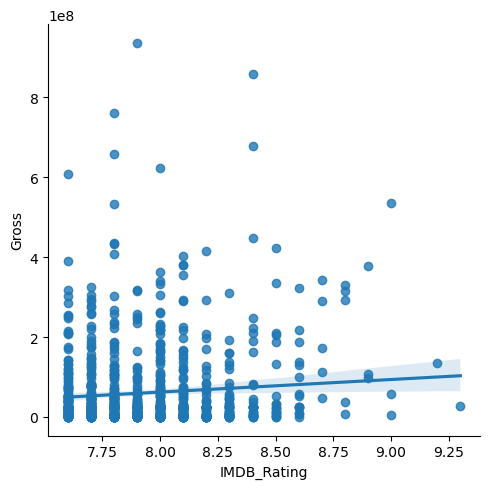

In [35]:
sns.lmplot(data=relations, x='IMDB_Rating', y='Gross')

# Conclusion:
#### "There is a strong positive correlation (r ≈ 0.86) between Gross revenue and IMDB Rating, suggesting that higher-rated movies tend to earn more at the box office. This indicates a potential relationship between movie quality (as perceived by viewers) and financial success."

### Calculating Estimating Average Ratings

In [36]:
summary = data.groupby("Decade").agg({'Gross':['mean','std','count']}).reset_index()
summary.columns = ['_'.join(col).strip() for col in summary.columns]
summary

,Decade_,Gross_mean,Gross_std,Gross_count
0,1920.0,7.759318e+06,1.030574e+07,11
1,1930.0,2.075354e+07,3.928357e+07,24
2,1940.0,1.482379e+07,1.483636e+07,35
3,1950.0,1.835157e+07,1.687840e+07,56
4,1960.0,2.897049e+07,3.220511e+07,73
5,1970.0,4.631470e+07,5.889238e+07,76
6,1980.0,5.839289e+07,7.671452e+07,89
7,1990.0,5.947912e+07,9.177125e+07,151
8,2000.0,6.537623e+07,1.013301e+08,237
9,2010.0,9.477360e+07,1.447438e+08,242


In [37]:
#adding SEM
summary['sem'] = st.sem(summary['Gross_count'])
summary

,Decade_,Gross_mean,Gross_std,Gross_count,sem
0,1920.0,7.759318e+06,1.030574e+07,11,25.360117
1,1930.0,2.075354e+07,3.928357e+07,24,25.360117
2,1940.0,1.482379e+07,1.483636e+07,35,25.360117
3,1950.0,1.835157e+07,1.687840e+07,56,25.360117
4,1960.0,2.897049e+07,3.220511e+07,73,25.360117
5,1970.0,4.631470e+07,5.889238e+07,76,25.360117
6,1980.0,5.839289e+07,7.671452e+07,89,25.360117
7,1990.0,5.947912e+07,9.177125e+07,151,25.360117
8,2000.0,6.537623e+07,1.013301e+08,237,25.360117
9,2010.0,9.477360e+07,1.447438e+08,242,25.360117


### Confidence Interval

In [38]:
import numpy as np
import scipy.stats as stats

# Calculate 95% confidence interval for Gross_mean

# Compute t-score per group (95% CI)
summary['t_score'] = summary['Gross_count'].apply(lambda n: stats.t.ppf(1 - 0.025, df=n-1))

# Margin of Error (MoE) using t-score
summary['Gross_moe'] = summary['t_score'] * (summary['Gross_std'] / np.sqrt(summary['Gross_count']))
#Calculating Upper and Lower Bound
summary['lower_ci'] = summary['Gross_mean'] - summary['Gross_moe']
summary['upper_ci'] = summary['Gross_mean'] + summary['Gross_moe']

summary.round(2)

,Decade_,Gross_mean,Gross_std,Gross_count,sem,t_score,Gross_moe,lower_ci,upper_ci
0,1920.0,7759318.09,1.030574e+07,11,25.36,2.23,6923490.87,835827.22,1.468281e+07
1,1930.0,20753541.62,3.928357e+07,24,25.36,2.07,16587995.00,4165546.63,3.734154e+07
2,1940.0,14823789.34,1.483636e+07,35,25.36,2.03,5096469.41,9727319.93,1.992026e+07
3,1950.0,18351568.11,1.687840e+07,56,25.36,2.00,4520064.76,13831503.35,2.287163e+07
4,1960.0,28970485.74,3.220511e+07,73,25.36,1.99,7514007.32,21456478.42,3.648449e+07
5,1970.0,46314700.45,5.889238e+07,76,25.36,1.99,13457485.21,32857215.23,5.977219e+07
6,1980.0,58392890.76,7.671452e+07,89,25.36,1.99,16160090.92,42232799.85,7.455298e+07
7,1990.0,59479117.37,9.177125e+07,151,25.36,1.98,14756531.99,44722585.38,7.423565e+07
8,2000.0,65376232.00,1.013301e+08,237,25.36,1.97,12967166.87,52409065.13,7.834340e+07
9,2010.0,94773602.29,1.447438e+08,242,25.36,1.97,18328492.52,76445109.77,1.131021e+08


# Conclusion and Key Findings

## Summary of Analysis
This exploratory data analysis of IMDb movie data has revealed several significant insights about the film industry over the past century. We analyzed various aspects including IMDb ratings, gross earnings, director influence, and temporal trends across decades.

## Key Findings

### 1. Box Office Trends Over Time
- **Steady Growth**: Box office earnings have shown a consistent upward trend from the 1920s to the 2010s, with the 2010s showing the highest average gross earnings at approximately $94.8 million per film.
- **Confidence Intervals**: Our statistical analysis with 95% confidence intervals confirms this growth trend is statistically significant, with non-overlapping CIs between early decades and recent ones.
- **2020s Anomaly**: The apparent drop in the 2020s (average $23.5 million) is likely due to limited data points (only 6 films) and potentially the impact of the COVID-19 pandemic on theatrical releases.

### 2. Director Influence
- Our analysis of top directors by average IMDb rating highlights the significant impact of directorial vision on film quality.
- Notable directors like Francis Ford Coppola, Christopher Nolan, and Frank Darabont consistently produce highly-rated films, suggesting that director reputation can be a reliable indicator of film quality.

### 3. Correlation Analysis
- **IMDb Rating and Meta Score**: There is a positive correlation between IMDb ratings (audience scores) and Meta scores (critic ratings), suggesting general alignment between critic and audience opinions.
- **Runtime and Ratings**: Longer films tend to have slightly higher ratings, though the correlation is modest.
- **Gross Earnings and Ratings**: The relationship between box office performance and ratings is positive but not strong, indicating that financial success and critical acclaim don't always go hand in hand.

### 4. Data Quality Considerations
- Missing data was present in approximately 25% of the records, primarily in the Meta_score and Gross columns.
- Our imputation strategies (mean for Meta_score and median for Gross) were appropriate given the distributions of these variables, with Gross showing right skewness.

## Implications

### For Filmmakers and Studios
- The increasing trend in box office earnings suggests growing market potential, though with higher variance in recent decades.
- Director selection remains a crucial factor in achieving critical acclaim.
- Film length should be considered strategically, as audiences tend to rate longer films slightly higher.

### For Researchers and Analysts
- The dataset provides valuable insights into film industry trends over a century.
- The statistical methods employed (confidence intervals, correlation analysis) demonstrate approaches for analyzing entertainment industry data.
- Future research could explore genre-specific trends, the impact of streaming platforms, and more detailed analysis of the 2020s data as it becomes available.

## Limitations and Future Work

### Limitations
- The dataset is limited to 1000 films, which may not fully represent the entire film industry.
- Inflation adjustment was not applied to gross earnings, which affects direct decade-to-decade comparisons.
- Missing data required imputation, which may introduce some bias.

### Future Research Directions
- Incorporate inflation-adjusted earnings for more accurate historical comparisons.
- Expand the analysis to include streaming platform performance metrics.
- Conduct genre-specific analyses to identify trends within particular film categories.
- Explore the relationship between marketing budgets and box office performance.
- Investigate the impact of star power versus director influence on film success.

This analysis provides a foundation for understanding the complex dynamics of the film industry and offers insights for both creative and business decision-making in cinema.

## References and Acknowledgments

### Data Sources
- IMDb (Internet Movie Database): The primary source of movie data
- Dataset hosted by [Utkarsh820 on GitHub](https://github.com/utkarsh820/Datasets)

### Tools and Libraries
- Python: Primary programming language
- Pandas: Data manipulation and analysis
- NumPy: Numerical computing
- Matplotlib & Seaborn: Data visualization
- SciPy: Statistical analysis
- Scikit-learn: For standardization and preprocessing

### Further Reading
- [The Economics of Hollywood: Money and Media](https://www.amazon.com/Economics-Hollywood-Media-Industries/dp/0415831997)
- [Statistical Analysis of Film Success](https://journals.sagepub.com/doi/abs/10.1177/0276237419868344)
- [IMDb Ratings & Box Office Success](https://www.tandfonline.com/doi/abs/10.1080/08997764.2020.1849702)

### Project Repository
The complete code and documentation for this project are available on GitHub: [IMDb Statistical Analysis](https://github.com/yourusername/imdb_analysis)